# Exploratory analysis of my Lichess puzzle activity
---

## Overview

In this notebook, we take a look at my puzzle activity to see how my puzzle rating has changed over time and the effect some puzzle features have on my performance.


## Contents

1. [Import the required packages and load the data](#import)
2. [My puzzle rating over time](#rating)
3. [My win rate](#win-rate)

# Import the required packages and load the data<a name='import'></a>
---

We'll use the following packages.
- [`pandas`](https://pandas.pydata.org/docs/) for processing the data.
- [`rpy2`](https://rpy2.github.io/doc/v3.0.x/html/index.html) for its [`ggplot2`](https://rpy2.github.io/doc/v3.0.x/html/graphics.html#package-ggplot2) visualizations.

In [ ]:
import pandas as pd

!pip install rpy2==3.5.1 #Newer versions of `ryp2` were causing issues.

%reload_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318085 sha256=1645f0967ff7ffad929751c9671cbbc6ab983a6056d451b3fec415e45ba9be42
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


The cell below uses `%%R` to run some `R` code that installs and loads the `tidyverse` packages needed to create our visualizations with `ggplot2`. We'll also use `lubridate` to make it easier to work with dates and datetimes, as well as `patchwork` to easily combine figures.

In [ ]:
%%R
install.packages("tidyverse")
install.packages("lubridate")
install.packages("patchwork")

library("tidyverse")
library("lubridate")
library("patchwork")

(as ‘lib’ is unspecified)



















	‘/tmp/Rtmp7qwJTa/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp7qwJTa/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp7qwJTa/downloaded_packages’



## Puzzle activity

Now let's load the `tclark_puzzle_activity_clean.csv` data from `puzzle_journey_data_collection_processing.ipynb`.



In [ ]:
puzzle_activity_df = pd.read_csv('tclark_puzzle_activity_clean.csv')

puzzle_activity_df.head()

,id,date,win,puzzleRating
0,nhQA7,2023-03-30 20:14:18.719,True,1871
1,0BoYj,2023-03-30 20:12:38.469,True,1686
2,Yq8Ld,2023-03-27 17:50:22.328,True,1913
3,49u5p,2023-03-27 17:49:40.924,True,1933
4,mQPeh,2023-03-27 17:49:04.291,True,1756


Let's see how many puzzles I played.

In [ ]:
puzzle_activity_df.shape

(1716, 4)

Push `puzzle_activity_df` to the `R` namespace.

In [ ]:
%Rpush puzzle_activity_df

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


## Rating history

Next, the `tclark_puzzle_rating_history_clean.csv` data.

In [ ]:
puzzle_rating_history_df = pd.read_csv('tclark_puzzle_rating_history_clean.csv')

puzzle_rating_history_df.head()

,year,month,day,rating
0,2022,2,20,1423
1,2022,3,12,1482
2,2022,3,13,1443
3,2022,3,14,1486
4,2022,3,15,1510


Let's combine the `year`, `month`, and `day` columns into a single `date` column.

In [ ]:
puzzle_rating_history_df['date'] = pd.to_datetime(puzzle_rating_history_df[['year', 'month', 'day']])

puzzle_rating_history_df.head()

,year,month,day,rating,date
0,2022,2,20,1423,2022-02-20
1,2022,3,12,1482,2022-03-12
2,2022,3,13,1443,2022-03-13
3,2022,3,14,1486,2022-03-14
4,2022,3,15,1510,2022-03-15


Now, push this to the `R` namespace.

In [ ]:
%Rpush puzzle_rating_history_df

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/datetimes.py:2177: PytzUsageWarning: The zone attribute is specific to pytz's interface; please migrate to a new time zone provider. For more details on how to do so, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  result, tz_parsed = tslib.array_to_datetime(


## Puzzles database

We'll also need the `lichess_db_puzzle_clean.csv` data.

In [ ]:
puzzles_df = pd.read_csv('lichess_db_puzzle_clean.csv')

puzzles_df.head()

,Puzzle_ID,FEN,Moves,Rating,Rating_Deviation,Popularity,Number_of_Plays,Themes,URL,Opening_Tags,Puzzle_Length
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1925,74,95,3136,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN,5
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1518,75,96,19577,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN,3
2,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1172,75,86,538,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,3
3,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1565,81,89,80,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,NaN,5
4,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1520,75,100,169,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,NaN,3


We won't need to work with the entire database, though—just the puzzles that I played. So, we can join `puzzles_df` to `puzzle_activity_df` along the ID columns. Note that we drop the `Rating` column from the result—since many of the puzzle ratings have changed since I played the puzzles, I chose to keep their rating at the time I played them (which is stored in the `puzzleRating` column of `puzzle_activity_df`).

In [ ]:
played_puzzles_df = puzzles_df.set_index('Puzzle_ID').join(puzzle_activity_df.set_index('id'), 
                                                           how = 'inner')
played_puzzles_df.drop(columns = ['Rating'], inplace = True)
played_puzzles_df.head()

,FEN,Moves,Rating_Deviation,Popularity,Number_of_Plays,Themes,URL,Opening_Tags,Puzzle_Length,date,win,puzzleRating
00XTV,8/2k4p/p2p2p1/2pP1p2/2P4P/3K4/P2R1PP1/4r3 w - ...,d2e2 e1e2 d3e2 c7b6 e2f3 b6a5 a2a3 a5a4,74,95,7169,crushing endgame master rookEndgame veryLong,https://lichess.org/6kM7Fimp#55,NaN,7,2022-05-31 11:15:42.090,True,1649
012kM,5r2/1pp4k/p1n1p2p/3p2p1/3P2P1/2P2q2/PP1Q1P2/1K...,d2g5 f3d3 b1c1 d3f1 h1f1 h6g5,77,95,10542,crushing endgame long,https://lichess.org/fJcBht8L#61,NaN,5,2022-06-06 11:13:47.994,False,1781
01IKl,k1r4r/2Qn1p1p/1p1Bpnp1/q7/2BP4/2P5/1PK2P1P/3R2...,c7c8 h8c8 d1a1 c8c4 a1a5 b6a5,74,92,652,advantage hangingPiece long middlegame,https://lichess.org/ehmsGMwl#57,NaN,5,2022-08-07 15:10:30.761,True,1822
02pc3,r5k1/4bppp/4p3/q2pN3/3Bn3/8/P3QPPP/2R3K1 b - -...,a5a2 e2a2 a8a2 c1c8 e7f8 e5d7,74,96,912,advantage long middlegame,https://lichess.org/HhgKmKDI/black#46,NaN,5,2023-02-05 18:55:28.753,True,2183
051YJ,7k/pp2q1p1/1n2p1Bp/1b3pN1/1n1P3P/8/PP1K1PP1/1Q...,h6g5 h4g5 h8g8 h1h8 g8h8 b1h1 h8g8 h1h7 g8f8 h7h8,74,95,12586,attraction discoveredAttack kingsideAttack mat...,https://lichess.org/BLp2HacV/black#48,NaN,9,2022-07-11 22:23:19.404,False,1620


We can quickly check that we have all the puzzles that I played (`1,716`).

In [ ]:
played_puzzles_df.shape

(1716, 12)

Now check for missing values.

In [ ]:
played_puzzles_df.isna().sum(axis = 0)

FEN                    0
Moves                  0
Rating_Deviation       0
Popularity             0
Number_of_Plays        0
Themes                 0
URL                    0
Opening_Tags        1246
Puzzle_Length          0
date                   0
win                    0
puzzleRating           0
dtype: int64

Only the `Openings_Tags` contains missing values—this is consistent with `puzzles_df`.

Now we can save this dataframe for future use (if necessary).

In [ ]:
played_puzzles_df.to_csv('tclark_played_puzzles.csv')

Finally, push `played_puzzles_df` to the `R` namespace. We have to cast the `Opening_Tags` column as `string` first to avoid encoding errors.

In [ ]:
played_puzzles_dfr = played_puzzles_df.astype({'Opening_Tags': 'str'})

%Rpush played_puzzles_dfr

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


# My puzzle rating over time<a name='rating'></a>
---

## Highest rating

My highest puzzle rating was `2,510`. How does it compare to the distribution of puzzle ratings?

In [ ]:
def percentile(rating):
  return (puzzles_df.loc[:, 'Rating'][puzzles_df['Rating'] < rating].count())/(puzzles_df['Rating'].count()) * 100

In [ ]:
percentile(2510)

96.34500867890581

So, my highest rating is in the `96th` percentile of puzzle ratings. Not bad!

## Rating by day

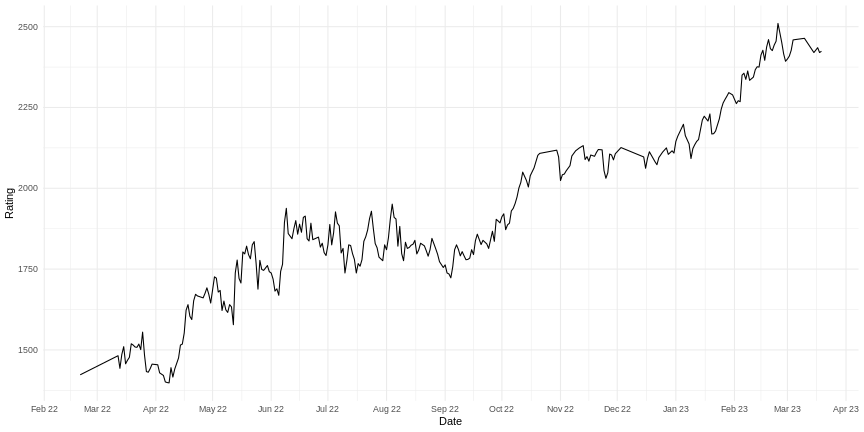

In [ ]:
%%R -h 6 -w 12 -u in
rating_plot <- ggplot(puzzle_rating_history_df, aes(x = date, y = rating))+
  scale_x_datetime(date_labels= "%b %y", 
                   date_breaks  = "1 month")+   
  labs(x = "Date", y = "Rating")+
  geom_line()+
  theme_minimal()

rating_plot

My rating fluctuated a lot, with an approximately `4`-month plateau in the `1,700--1,900` range from mid-May 2022 through August 2022, followed by a climb over `2,000` in September 2022 through about mid-October 2022. I plateaued again aroung `2,000--2,100` for almost `3` months, after which I had another spike in progress up to `2,500`.

Overall, it seems I have gone through a cycle that looks something like
- `1` or `2` months of improvement.
- `3` or `4` months of plateau.

Below is the same plot with a smooth representation of the trend added.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


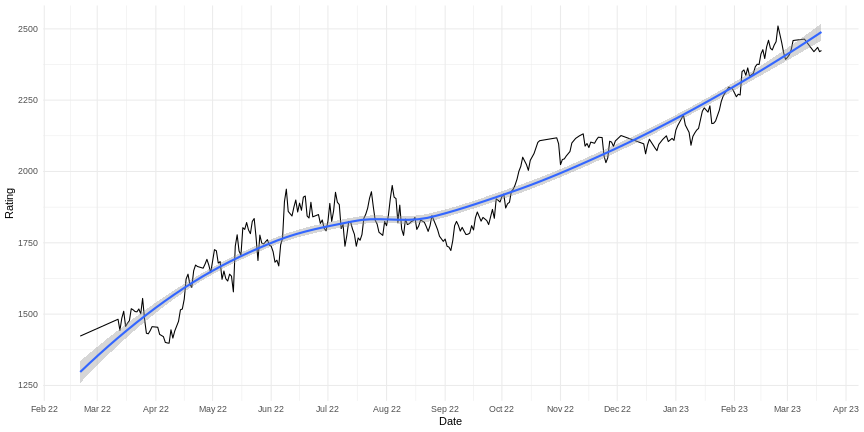

In [ ]:
%%R -h 6 -w 12 -u in
ggplot(puzzle_rating_history_df, aes(x = date, y = rating))+
  scale_x_datetime(date_labels= "%b %y", 
                   date_breaks  = "1 month")+   
  labs(x = "Date", y = "Rating")+
  geom_line()+
  geom_smooth()+
  theme_minimal()

We can see the plateaus and increases broken up a bit more in the figures below.

`geom_smooth()` using formula = 'y ~ x'


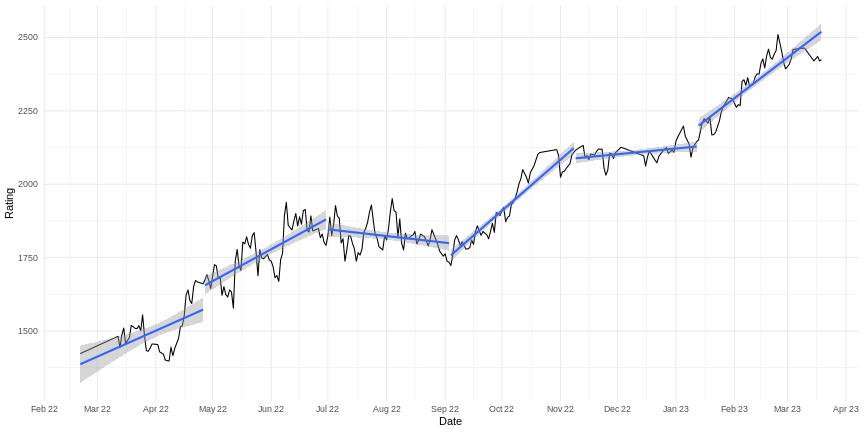

In [ ]:
%%R -h 6 -w 12 -u in
ggplot(puzzle_rating_history_df, aes(x = date, y = rating))+
  scale_x_datetime(date_labels= "%b %y",
                   date_breaks  = "1 month")+   
  labs(x = "Date", y = "Rating")+
  geom_line()+
  geom_smooth(method = lm, aes(group = cut_interval(date, 6)))+
  theme_minimal()

This figure considers my rating broken into intervals of `2`-months.

`geom_smooth()` using formula = 'y ~ x'


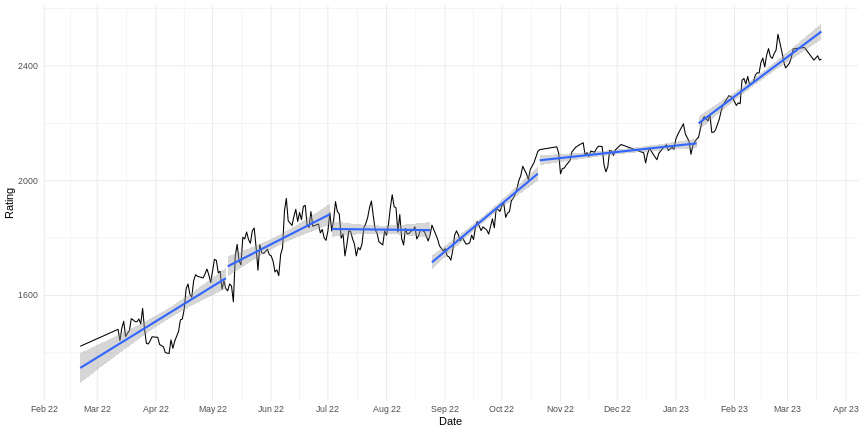

In [ ]:
%%R -h 6 -w 12 -u in
ggplot(puzzle_rating_history_df, aes(x = date, y = rating))+
  scale_x_datetime(date_labels= "%b %y", 
                   date_breaks  = "1 month")+   
  labs(x = "Date", y = "Rating")+
  geom_line()+
  geom_smooth(method = lm, aes(group = cut_number(date, 6)))+
  theme_minimal()

This figure considers my rating broken into `6` segements each containing an approximately equal number of days. Observe the plateaus from July 2022 to September 2022 and from mid-October 2022 through January 2023.

## Volume of puzzles per day

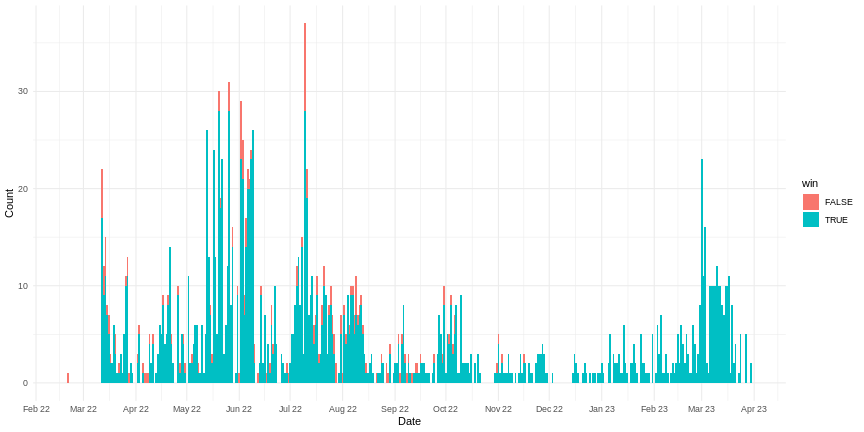

In [ ]:
%%R -h 6 -w 12 -u in
volume_plot <- ggplot(puzzle_activity_df, aes(x = as.Date(date)))+
  labs(x = "Date", y = "Count")+
  scale_x_date(date_labels= "%b %y", 
               date_breaks  = "1 month")+
  geom_histogram(aes(fill = win), binwidth = 1)+
  theme_minimal()

volume_plot

From mid-October 2022 through February 2023, you can see that I started playing fewer puzzles total. I had plateaued in the `2,000--2,100` range around this time and decided shortly after that I wasn't going to play a puzzle until I was absolutely certain I had found the solution—no matter how long it took. This meant that puzzles would sometimes take me *days* to solve, but it also meant that I improved my win rate. 

Around this time, I also began occassionally playing a lot of easy *unrated* puzzles in between the more difficult rated puzzles—so the volumes on the graph may be a bit misleading, since I was only completing a rated puzzle once every couple of days. Around March 2023 I begain playing a *lot* of unrated puzzles, which is why there is a large increase in puzzle volume around this time.

Whether all of this resulted in me learning more is debatable, but it did have a noticeable impact on improving my puzzle rating. Below, you can compare my puzzle rating with number of puzzles played per day.

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


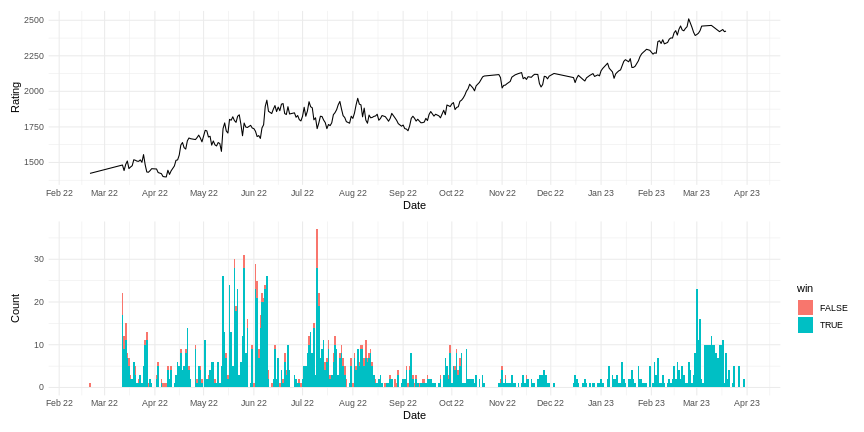

In [ ]:
%%R -h 6 -w 12 -u in

(rating_plot + scale_x_datetime(date_labels= "%b %y", 
                                date_breaks  = "1 month",
                                limits = as.POSIXct(c("2022-02-15", "2023-04-01")))) / 
(volume_plot + scale_x_date(date_labels= "%b %y", 
                            date_breaks  = "1 month",
                            limits = as.Date(c("2022-02-15", "2023-04-01"))))

Notice, again, around mid-October 2022 I plateaued and about a month later is when I started taking as long as necessary to solve a puzzle (hence played fewer rated puzzles). After taking a break in ealry December, I finally overcame the `2,100` rating barrier.

Ultimately, if you're looking for the secret to improving your puzzle rating, my advice is

>Keep getting puzzles correct!

The strategy of only attempting a puzzle when I was as sure as possible that I had found the solution meant I played fewer puzzles, but I almost always got them right—so my rating kept going up!

## Failed puzzles
Let's see what we can find out about the puzzles that I failed. Below, we extract the records from `played_puzzles_df` where `win` is `False`.

In [ ]:
failed_puzzles_df = played_puzzles_df[played_puzzles_df['win'] == False]

failed_puzzles_df.head()

,FEN,Moves,Rating_Deviation,Popularity,Number_of_Plays,Themes,URL,Opening_Tags,Puzzle_Length,date,win,puzzleRating
012kM,5r2/1pp4k/p1n1p2p/3p2p1/3P2P1/2P2q2/PP1Q1P2/1K...,d2g5 f3d3 b1c1 d3f1 h1f1 h6g5,77,95,10542,crushing endgame long,https://lichess.org/fJcBht8L#61,NaN,5,2022-06-06 11:13:47.994,False,1781
051YJ,7k/pp2q1p1/1n2p1Bp/1b3pN1/1n1P3P/8/PP1K1PP1/1Q...,h6g5 h4g5 h8g8 h1h8 g8h8 b1h1 h8g8 h1h7 g8f8 h7h8,74,95,12586,attraction discoveredAttack kingsideAttack mat...,https://lichess.org/BLp2HacV/black#48,NaN,9,2022-07-11 22:23:19.404,False,1620
0A7bx,5rk1/3p1pp1/p3n2p/1p2p3/1P2q3/1Br1B2Q/P5PP/R4R...,b3e6 c3e3 e6d5 e4d4 h3e3 d4e3,74,96,3076,crushing kingsideAttack long middlegame,https://lichess.org/TZRp4ALP#51,NaN,5,2022-08-06 01:11:45.675,False,1904
0MHtG,1k5r/1bpqp3/pp4p1/4p3/3P2n1/2NB2Q1/PPP3P1/3R1R...,d4e5 d7d4 f1f2 g4f2 g3f2 h8h1 g1h1 d4f2,77,96,6247,crushing deflection kingsideAttack middlegame ...,https://lichess.org/wr31QDv1#39,NaN,7,2022-05-28 17:44:27.030,False,1561
0SwnO,8/p2R2k1/4p2p/4Pqp1/2N1n3/1P3BPP/P3K3/8 b - - ...,g7g6 f3h5 g6h5 g3g4 h5g6 g4f5,82,91,146922,attraction crushing endgame fork long sacrifice,https://lichess.org/aCTkYtvo/black#76,NaN,5,2022-03-28 23:14:14.894,False,2217


How many puzzles have a I failed?

In [ ]:
failed_puzzles_df.shape

(165, 12)

With `165` failed puzzles out of `1,716` total puzzles played, I have an overall success rate of `90%`.

In [ ]:
(1 - (165/1716))*100

90.38461538461539

Now, let's see the descriptive statistics for my failed puzzles compared to all of my played puzzles.

In [ ]:
failed_puzzles_df.describe()

,Rating_Deviation,Popularity,Number_of_Plays,Puzzle_Length,puzzleRating
count,165.000000,165.000000,165.000000,165.000000,165.000000
mean,76.945455,93.509091,43615.842424,4.696970,1816.763636
std,3.280122,3.138312,56824.801953,1.491538,220.422568
min,71.000000,70.000000,212.000000,3.000000,984.000000
25%,75.000000,92.000000,4998.000000,3.000000,1704.000000
50%,76.000000,94.000000,9326.000000,5.000000,1823.000000
75%,79.000000,95.000000,121043.000000,5.000000,1973.000000
max,88.000000,98.000000,157807.000000,9.000000,2344.000000


In [ ]:
played_puzzles_df.describe()

,Rating_Deviation,Popularity,Number_of_Plays,Puzzle_Length,puzzleRating
count,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000
mean,75.900932,94.048368,16359.643939,4.351981,1807.323427
std,3.452059,2.891526,33833.214927,1.536230,221.321003
min,70.000000,52.000000,22.000000,1.000000,984.000000
25%,74.000000,93.000000,3194.000000,3.000000,1673.750000
50%,75.000000,95.000000,6706.500000,5.000000,1798.000000
75%,77.000000,96.000000,10885.250000,5.000000,1922.000000
max,142.000000,100.000000,176174.000000,13.000000,2661.000000


Nothing striking jumps out at me here.

# Win rate<a name='win-rate'></a>
---

## Win correlation

Are any of the puzzle features correlated with the `win` column?

In [ ]:
played_puzzles_df.corr(numeric_only = True)

,Rating_Deviation,Popularity,Number_of_Plays,Puzzle_Length,win,puzzleRating
Rating_Deviation,1.000000,-0.250007,0.388279,0.015595,-0.098719,0.207310
Popularity,-0.250007,1.000000,-0.301106,-0.027331,0.060848,-0.236615
Number_of_Plays,0.388279,-0.301106,1.000000,0.074768,-0.262836,0.169313
Puzzle_Length,0.015595,-0.027331,0.074768,1.000000,-0.073267,0.143086
win,-0.098719,0.060848,-0.262836,-0.073267,1.000000,-0.013916
puzzleRating,0.207310,-0.236615,0.169313,0.143086,-0.013916,1.000000


Interestingly, there is hardly any correlation between `win` and `puzzleRating`, suggesting that my strategy of taking as long as necessary to solve a puzzle may be able to take my rating higher still (though I don't think I have the patience for that). 

The negative correlation between `puzzleRating` and `win` is stronger (though still weak) for puzzles played before October 2022.

In [ ]:
played_puzzles_df[played_puzzles_df['date'] < "2022-10-01"].corr(numeric_only = True)

,Rating_Deviation,Popularity,Number_of_Plays,Puzzle_Length,win,puzzleRating
Rating_Deviation,1.000000,-0.467261,0.657128,0.039464,-0.197549,0.235070
Popularity,-0.467261,1.000000,-0.412549,-0.002720,0.111071,-0.191159
Number_of_Plays,0.657128,-0.412549,1.000000,0.084330,-0.257125,0.408007
Puzzle_Length,0.039464,-0.002720,0.084330,1.000000,-0.092212,0.138387
win,-0.197549,0.111071,-0.257125,-0.092212,1.000000,-0.157737
puzzleRating,0.235070,-0.191159,0.408007,0.138387,-0.157737,1.000000


There does appear to be a weak negative correlation between `win` and `Number_of_Plays` in `played_puzzles_df`. Do I tend to fail puzzles that I have been played more often?

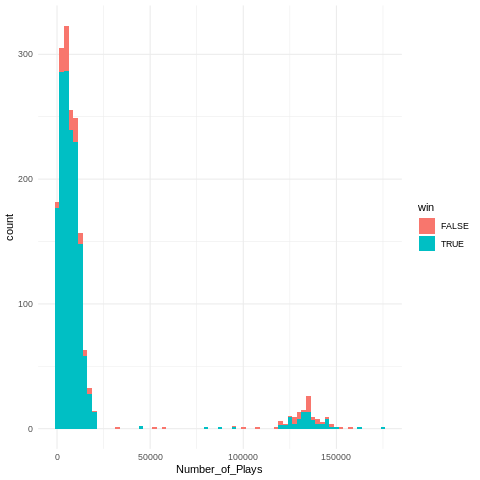

In [ ]:
%%R
ggplot(played_puzzles_dfr, aes(x = Number_of_Plays, fill = win))+
  geom_histogram(binwidth = 2500)+
  theme_minimal()

It does appear that my win rate for puzzles with more than `100,000` plays is lower, though I played fewer puzzles with that many plays, so the sample size could be too small to jump to any conclusions.

## Win Rate by time of day

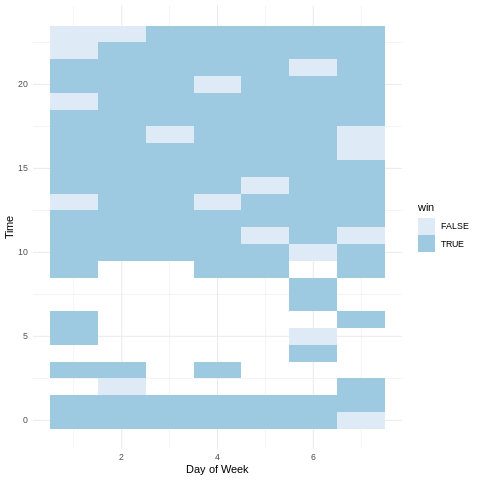

In [ ]:
%%R
ggplot(puzzle_activity_df, aes(x = wday(date), y = hour(date)))+
  labs(x = "Day of Week", y = "Time")+
  geom_tile(aes(fill = win))+
  scale_fill_brewer(palette = "Blues")+
  theme_minimal()

Monday and Tuesday seem to be my best puzzle days.

## Puzzle Rating vs. Win Rate

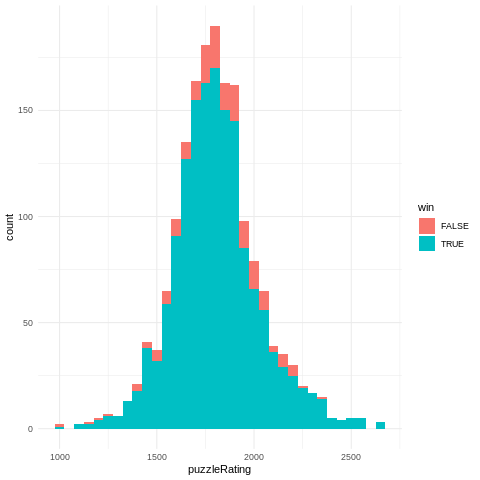

In [ ]:
%%R
ggplot(puzzle_activity_df, aes(x = puzzleRating))+
  geom_histogram(aes(fill = win), binwidth = 50)+
  theme_minimal()

The rating distribution of puzzles that I've played is unimodal and symmetric, with a median around `1,800`. When I play unrated puzzles, I usually keep them around the `1,800` range, which I find to be a pleasant level of difficulty for simply playing puzzles to pass the time.

I get the majority of my puzzles correct, but notice that puzzles with a rating of over `2,300` have a nearly `100%` win rate—again, this is a result of my strategy to only attempt a puzzle once I was as sure as possible of the solution, regardless of how long it takes. Despite what the high win rate might imply, I still find puzzles in this range to be quite challenging, often taking me days of concentrated effort to solve.

For reference, the descriptive statistics for the puzzle ratings of the puzzles I played is below.

In [ ]:
puzzle_activity_df.describe()

,puzzleRating
count,1716.000000
mean,1807.323427
std,221.321003
min,984.000000
25%,1673.750000
50%,1798.000000
75%,1922.000000
max,2661.000000


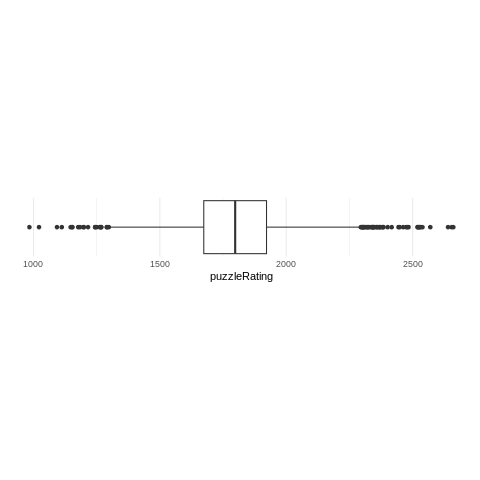

In [ ]:
%%R
ggplot(puzzle_activity_df, aes(x = puzzleRating))+
  geom_boxplot()+
  theme_minimal()+
  theme(aspect.ratio = 1/8, 
        axis.text.y = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank())

## Puzzle Length vs. Win Rate

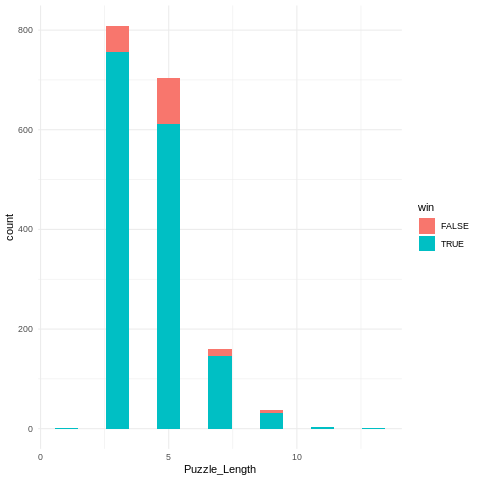

In [ ]:
%%R
ggplot(played_puzzles_dfr, aes(x = Puzzle_Length))+
  geom_bar(aes(fill = win))+
  theme_minimal()

Puzzle length doesn't seem to have a huge impact on my win rate, though there is a very weak negative correlation between them.

## Puzzle Theme vs. Win Rate

Below, we process the `Themes` data from `played_puzzles_df` as related to `win` in a similar manner to what we did with `Themes` and `Rating` from `puzzles_df` in `lichess_db_puzzle_eda_rating.ipynb`.

Note, below we have not included the `healthyMix` or `playerGames` themes because there are no puzzles in the database with those tags.

In [ ]:
theme_categories = ['advancedPawn', 'advantage', 'anastasiaMate', 'arabianMate', 'attackingF2F7',
                    'attraction', 'backRankMate', 'bishopEndgame', 'bodenMate', 'castling',
                    'capturingDefender', 'crushing', 'doubleBishopMate', 'dovetailMate', 'equality',
                    'kingsideAttack', 'clearance', 'defensiveMove', 'deflection', 'discoveredAttack',
                    'doubleCheck', 'endgame', 'enPassant', 'exposedKing', 'fork',
                    'hangingPiece', 'hookMate', 'interference', 'intermezzo', 'knightEndgame', 
                    'long', 'master', 'masterVsMaster', 'mate', 'mateIn1', 
                    'mateIn2', 'mateIn3', 'mateIn4', 'mateIn5', 'middlegame',
                    'oneMove', 'opening', 'pawnEndgame', 'pin', 'promotion',
                    'queenEndgame', 'queenRookEndgame', 'queensideAttack', 'quietMove', 'rookEndgame',
                    'sacrifice', 'short', 'skewer', 'smotheredMate', 'superGM', 
                    'trappedPiece', 'underPromotion', 'veryLong', 'xRayAttack', 'zugzwang']

In [ ]:
def theme_filter(theme):
  #Set the search condition in `mask` to look for the string `theme` in the `Themes` column.
  mask = played_puzzles_df['Themes'].str.contains(theme, case = True, na = False, regex = False)
  #Return the dataframe containing only puzzles with the specified `theme` in `Themes` column. 
  #We cast `Opening_Tags` as a `string` to avoid encoding errors when passing to `R`.
  return played_puzzles_df[mask].astype({'Opening_Tags': 'str'})

In [ ]:
theme_win_list = []
for theme in theme_categories:
  theme_win_list.append(theme_filter(theme)['win'].tolist())

In [ ]:
theme_win_dictionary = dict(zip(theme_categories, theme_win_list))

In [ ]:
theme_win_df = pd.DataFrame.from_dict(theme_win_dictionary, orient = 'index')
theme_win_df = theme_win_df.transpose()
theme_win_df.head()

,advancedPawn,advantage,anastasiaMate,arabianMate,attackingF2F7,attraction,backRankMate,bishopEndgame,bodenMate,castling,...,sacrifice,short,skewer,smotheredMate,superGM,trappedPiece,underPromotion,veryLong,xRayAttack,zugzwang
0,True,True,True,True,True,False,True,True,None,True,...,False,True,True,None,True,True,False,True,False,True
1,True,True,None,False,True,True,True,True,None,None,...,True,True,True,None,None,True,None,False,True,False
2,True,True,None,True,False,False,False,False,None,None,...,False,True,True,None,None,True,None,True,True,False
3,True,True,None,False,True,True,True,True,None,None,...,True,True,False,None,None,True,None,False,True,True
4,True,True,None,False,True,True,True,True,None,None,...,True,True,True,None,None,True,None,True,True,False


In [ ]:
melted_theme_win_df = theme_win_df.melt(id_vars = None, 
                                                var_name = 'Theme', 
                                                value_name = 'win')

melted_theme_win_df.head()

,Theme,win
0,advancedPawn,True
1,advancedPawn,True
2,advancedPawn,True
3,advancedPawn,True
4,advancedPawn,True


Remove the missing `win` values.

In [ ]:
melted_theme_win_df.dropna(inplace = True)

Push to `R` namespace.

In [ ]:
%Rpush melted_theme_win_df

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


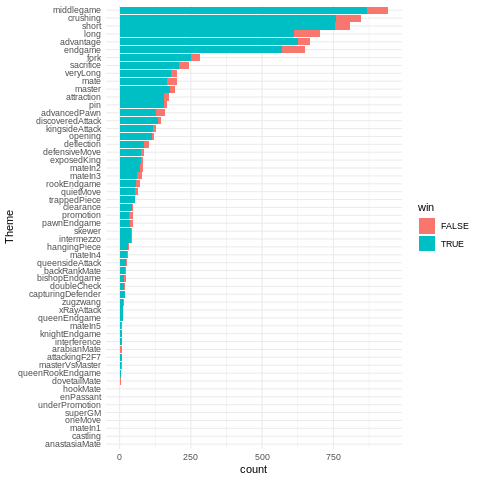

In [ ]:
%%R
ggplot(melted_theme_win_df, 
       aes(y = reorder(Theme, win, FUN = length)))+
  labs(y = "Theme")+
  geom_bar(aes(fill = win))+
  theme_minimal()

I should probably work on longer puzzles and endgames.

## Opening vs. Win Rate

Below, we process the `Opening_Tags` data from `played_puzzles_df` with respect to `win` in a similar manner to what we did with `Opening_Tags` and `Rating` from `puzzles_df` in `lichess_db_puzzle_eda_rating.ipynb`.

In [ ]:
opening_played_puzzles_df = played_puzzles_df.dropna()

opening_win_df = opening_played_puzzles_df[['win','Opening_Tags']]

opening_win_df['Opening_Tags'] = opening_win_df['Opening_Tags'].map(lambda x: x.split()[0])

opening_win_df.head()

<ipython-input-107-8f3d792ca2c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opening_win_df['Opening_Tags'] = opening_win_df['Opening_Tags'].map(lambda x: x.split()[0])


,win,Opening_Tags
06ASh,True,French_Defense
07TTy,True,Sicilian_Defense
0882c,True,English_Opening
0F2a2,True,Indian_Defense
0N7KX,True,Italian_Game


In [ ]:
%Rpush opening_win_df

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


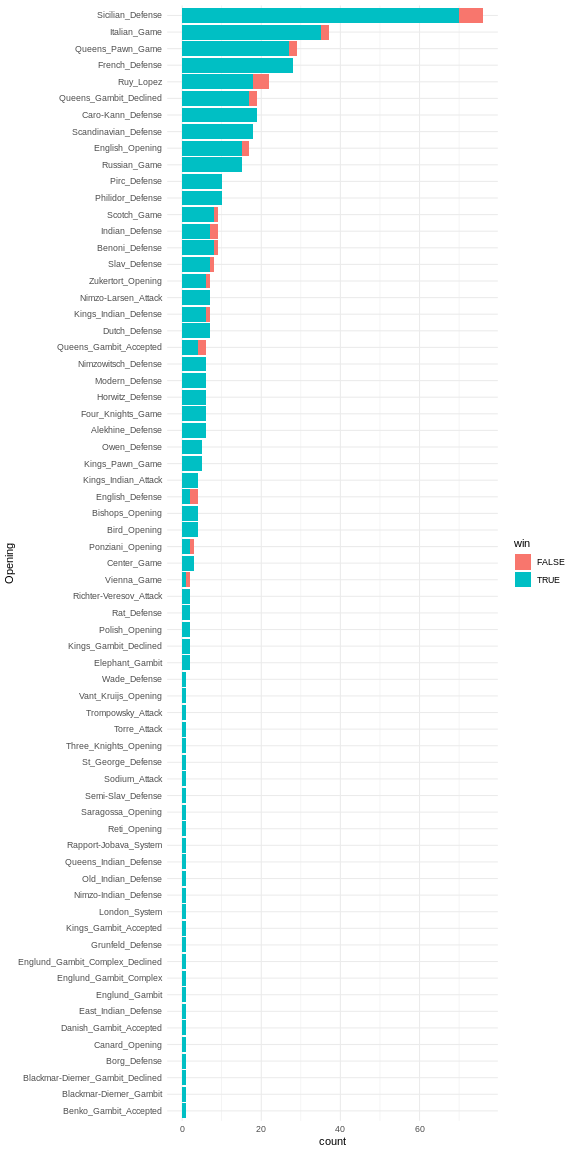

In [ ]:
%%R -h 16 -w 8 -u in
ggplot(opening_win_df, 
       aes(y = reorder(Opening_Tags, win, FUN = length)))+
  labs(y = "Opening")+
  geom_bar(aes(fill = win))+
  theme_minimal()

Perhaps I should consider playing the `French_Defense` more often.